# Derivatives

In [1]:
from sympy import *

#### derivatives

In [2]:
x = symbols('x') # declare x to sympy
fun = 2*x**2
deriv = diff(fun)
print(deriv)
print(deriv.subs(x, 4)) # the value of the derivative at x = 4

4*x
16


#### partial derivatives

In [3]:
x, y = symbols('x y')
fun = 2*x**3 + 3*y**3
deriv_x = diff(fun, x) # derivative of fun with respect to x
deriv_y = diff(fun, y) # derivative of fun with respect to y

#### calculating the derivative using the limit

y = f(x), y1 = f(x1), y2 = f(x2)

a = the slope of a line between two points that lie on a function plot

a = ((y + step) - y) / ((x + step) - x)

the derivative using the limit:

lim(step --> 0) ((y + step) - y) / ((x + step) - x)

In [4]:
x, step = symbols('x step')
fun = 3*x**2

#calculate the slope
slope_fun = (fun.subs(x, x + step) - fun) / ((x + step) - x)

#calculate the derivative using the limit
deriv = limit(slope_fun, step, 0)
print(deriv)

6*x


#### the chain rule

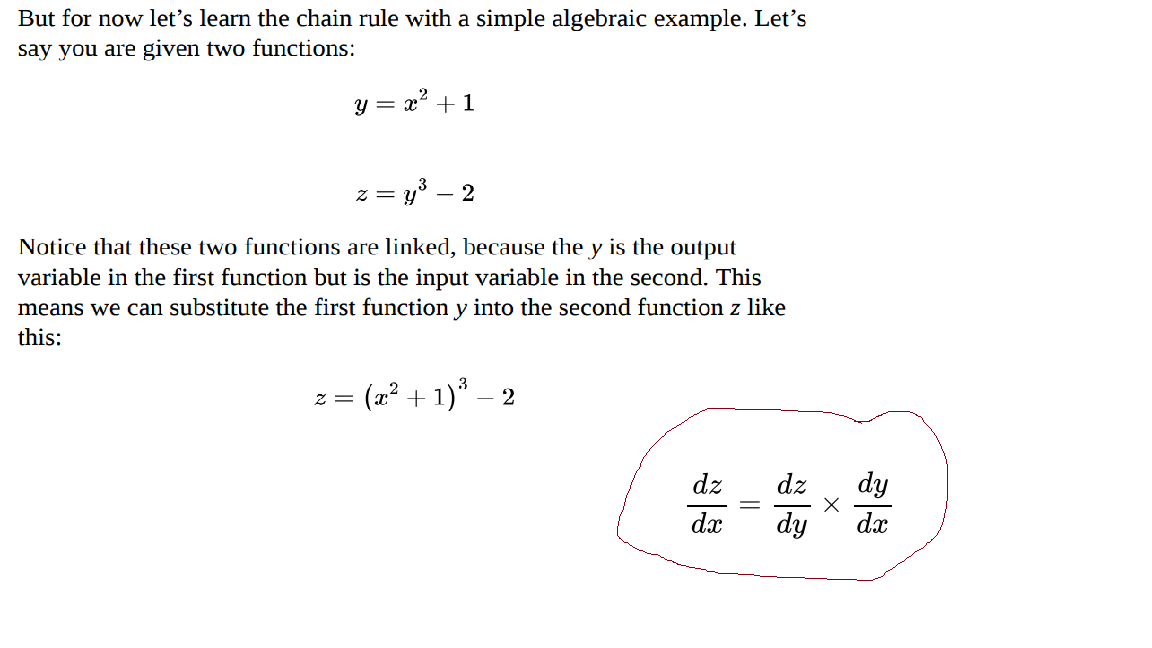

If we have two functions, with one common component (in our case y) then we can apply the chain rule. In our example if we want to calculate the derivative of z with respect to x, we can do this by multiplying the derivative of z with respect to y by the derivative of y with respect to x.

Offcourse the derivative of z with respect to x can be obtained by rewriting the function z by substituting y**3 for (x**2 + 1)**3. But the chain rule is widely used in deep learning.

In [5]:
x,y = symbols('x y')

# first function
# y_prim is equal to y in mathematical sense
# it is just named differently to avoid variable confusion in Python
y_prim = x**2 + 1

# second function
z = y**3 - 2

# derivative of first function
# derivative of y with respect to x
dy_dx = diff(y_prim)

# derivative of second function
# derivative of z with respect to y
dz_dy = diff(z)

# calculate the derivative of z with respect to x using the chain rule
dz_dx = (dy_dx * dz_dy).subs(y, y_prim)
print(dz_dx)

6*x*(x**2 + 1)**2


# Integrals

In [6]:
from sympy import *

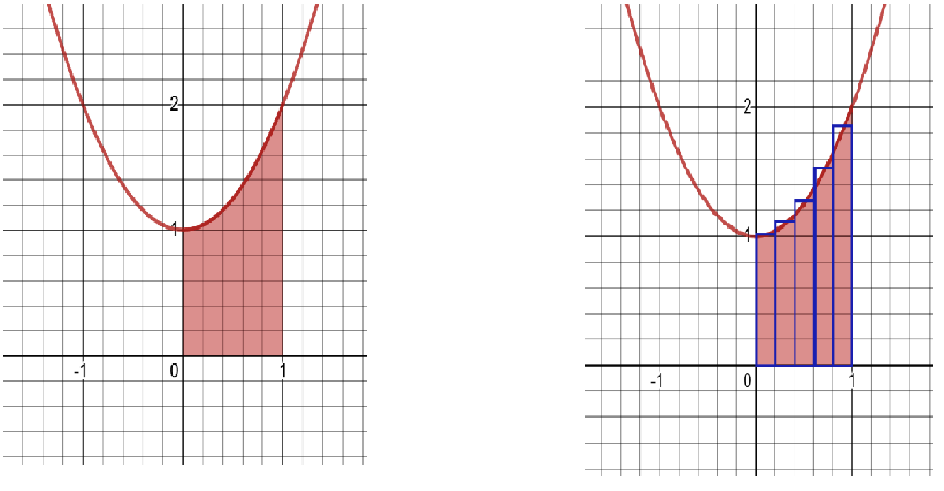

Integrals aim at finding the area under the curve (and above the x axis). One of the approaches is to fit rectagnles to the area as shown on the right figure. This gives us a vague approximation of the actual area under the curve. Intuitively the more rectangles we pack under the curve the better our estimation will be. So we calculate the derivative by measuring the area of n rectangles, where n approaches infinity.

#### easy integral calculation with SymPy

Unfortunately SymPy returns a fractional number (like 3/2) but most languages only deal with decimal numbers (like 1.143).

In [7]:
x = symbols('x')
fun = x**2 + 1

# find the area under the curve between x = 0 and x = 1
integral = integrate(fun, (x, 0, 1))
print(integral)

4/3


#### integral calvulation with SymPy using limits

Once again SymPy only returns fractions, which is bad.

In [8]:
x,i,n = symbols('x i n')
fun = x**2 + 1

# declare the range in which we integrate
lower = 0
upper = 1

# width of each rectangle
width = ((upper - lower)/n)

# value of x at point i
x_i = (lower + width*i)

# value of f(x) at point i
fx_i = fun.subs(x, x_i)

# iterate over all rectangles and sum their area
n_rectangles = Sum(width * fx_i, (i, 1, n)).doit()

# calculate the are under the curve with n approaching infinity
integral = limit(n_rectangles, n, oo)
print(integral)

4/3


#### integral calculation with base Python

This returns a decimal number, which is good.

In [9]:
"""
lower = lower bound of the range
upper = upper bound of the range
n = number of rectangles
function = function to calculate the derivative of
"""

# function to calculate the integral
def integral_calculator(lower, upper, n, function):
    # width of rectangle
    width = ((upper - lower) / n)
    # height of all n rectangles combined
    total_height = 0
    
    for i in range(1, n + 1):
        # midpoint is the place where the 'roof'
        # of the rectangle meets the function plot
        midpoint = 0.5 * (2 * lower + width * (2 * i - 1))
        # current height is the height of the i-th rectangle
        current_height = function(midpoint)
        total_height = total_height + current_height
    # calculate the total volume by multiplying
    # the combined height of all the rectangles by
    # the width of a rectangle
    return total_height * width

# a function of which we will calculate the integral
def example_function(x):
    return x**2 + 1

integral = integral_calculator(lower = 0, upper = 1, n = 5, function = example_function)
print(integral)

1.33


Just for fun we can look at how the integral estimation changes when we increase n.

n rectangles = 1, integral estimation = 1.25
n rectangles = 2, integral estimation = 1.3125
n rectangles = 3, integral estimation = 1.324074074074074
n rectangles = 4, integral estimation = 1.328125
n rectangles = 5, integral estimation = 1.33
n rectangles = 6, integral estimation = 1.3310185185185186
n rectangles = 7, integral estimation = 1.3316326530612244
n rectangles = 8, integral estimation = 1.33203125
n rectangles = 9, integral estimation = 1.332304526748971
n rectangles = 10, integral estimation = 1.3325
n rectangles = 11, integral estimation = 1.3326446280991735
n rectangles = 12, integral estimation = 1.3327546296296293
n rectangles = 13, integral estimation = 1.3328402366863905
n rectangles = 14, integral estimation = 1.332908163265306
n rectangles = 15, integral estimation = 1.332962962962963
n rectangles = 16, integral estimation = 1.3330078125
n rectangles = 17, integral estimation = 1.333044982698962
n rectangles = 18, integral estimation = 1.3330761316872428
n rectangl

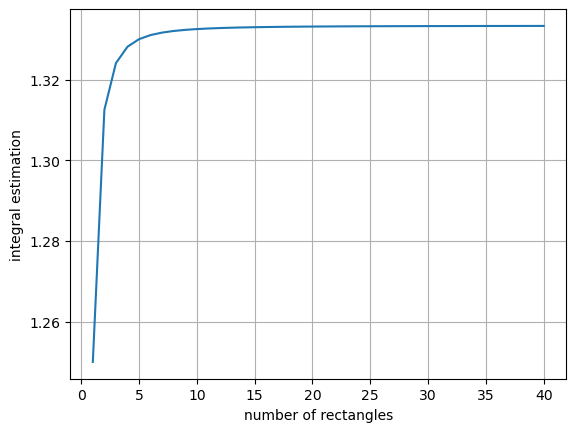

In [12]:
from matplotlib import pyplot as plt

x = []
y = []

for i in range(1, 40+1):
    integral = integral_calculator(lower = 0, upper = 1, n = i, function = example_function)
    print('n rectangles = {}, integral estimation = {}'.format(i, integral))
    x.append(i)
    y.append(integral)

plt.plot(x,y)
plt.grid()
plt.xlabel('number of rectangles')
plt.ylabel('integral estimation')
plt.show()